# Práctica 1: Casas en Boston

Esta es la primera práctica de la asignatura de **Análisis de Datos** del grado de *Ingeniería Informática* de la *UC3M* durante el curso 2020/21.


Autores:  
***Alba Reinders Sánchez***, 100383444, gr.83  
***Alejandro Valverde Mahou***, 100383383, gr.83

![](./images/imagen_boston.jpg)

El objetivo de esta práctica es predecir mediante un *modelo de regresión* una estimación del precio medio de la vivienda en distintas zonas de Boston.

El conjunto de datos está compuesto por **506** ejemplos, cada uno con **13** atributos. Más la clase a predecir.

Para ver qué representa cada uno de estos atributos, visitar el artículo original:
[Harrison Jr, David, and Daniel L. Rubinfeld. “Hedonichousingpricesand thedemandforcleanair.”Journalof environmentaleconomicsand management5, no. 1 (1978): pp. 81–102](https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air)

In [1]:
# Cabecera de los datos (atributos)
header = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 
          'black', 'lstat', 'medv']

## Tarea 1: Carga de datos

Se va a utilizar la librería *Pandas* para realizar esta tarea.

In [2]:
import pandas as pd

Debido a que las columnas del *.csv* están separadas por espacios irregulares, se ha realizado la siguiente conversión para que el separador sea la ',' y así poder cargar mejor los datos.

In [3]:
with open("housing.csv") as f:
    lines = f.readlines()

with open("housing_comas.csv", "w") as f2:
    for line in lines:
        line = line.split(' ')
        while '' in line:
            line.remove('')
        f2.write(','.join(map(str, line)))

In [4]:
data = pd.read_csv("./housing_comas.csv", header=None, names=header) 

assert data.shape == (506, 14), 'Los datos deben ser de la forma: 506 filas y 14 columnas'

display(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


El número de filas y columnas es el esperado: 506 fila y 14 columnas.

## Tarea 2: Análisis exploratorio

En primer lugar, se lleva a cabo un *resumen estadístico* para poder visualizar, de forma general, el aspecto de los datos.

In [5]:
display(data.describe())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A pesar de que este resumen aporta información útil referente a los datos, no es suficiente para realizar una visualización real de los mismos, pero permite intuir su estructura y es una buena forma de empezar a estudiar los datos.

En este resumen no se ha encontrado ningún valor dispar que haga sospechar de posibles errores en los datos.

Una vez realizado este estudio previo, se realiza un *histograma* de cada uno de los atributos.

In [6]:
import matplotlib.pyplot as plt

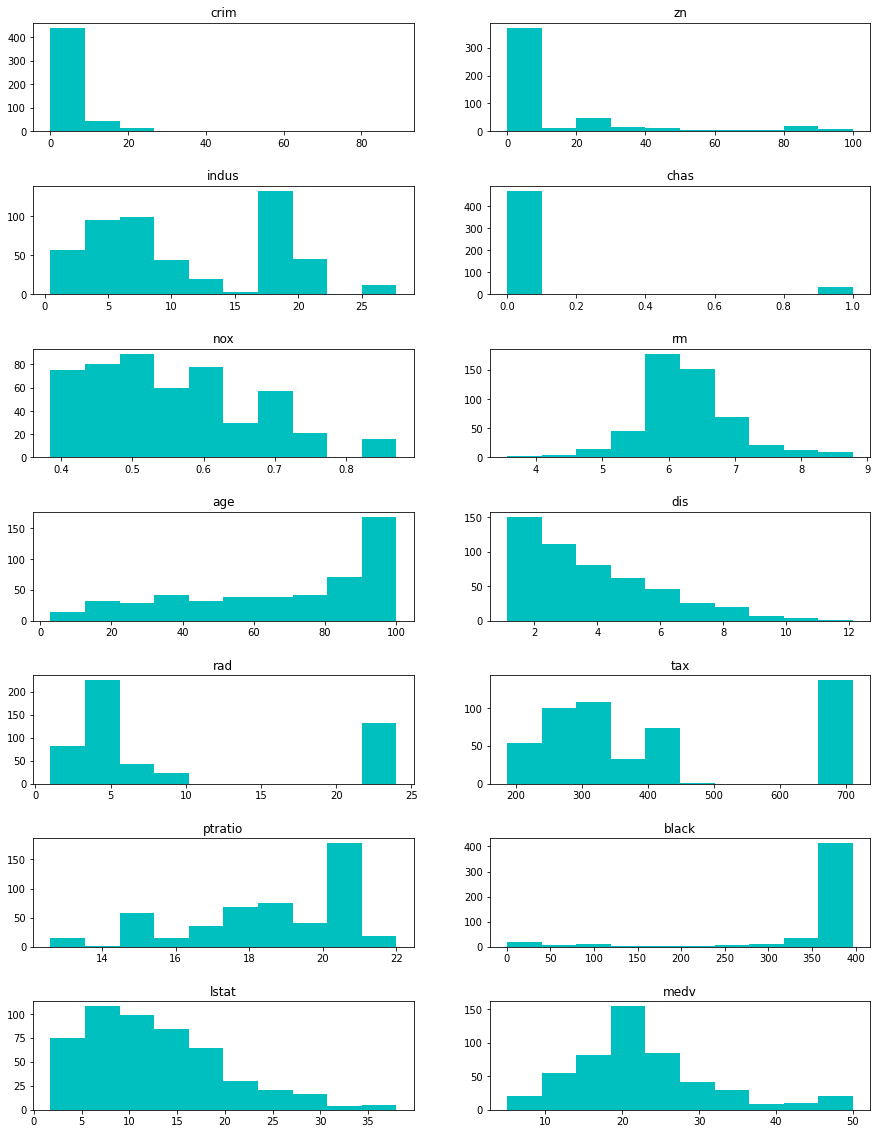

In [7]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)
for i in range(14):
    plt.subplot(7,2,i+1)
    plt.title(header[i])
    plt.hist(data[header[i]], color='c')
plt.show()

Esto permite ver la distribución de forma general de cada atributo por separado. Esta información sirve para conocer la estructura en la que se organizan los datos sin tener en cuenta su relación con el resto de atributos. 

Por ejemplo, se puede ver que la variable *tax* se divide en dos grupos bien diferenciados y la variable *age* tiene una cola hacia la derecha muy diferenciada.

Pero estudiar estos atributos por separado no aporta demasiado conocimiento, por lo que es necesario analizar su **correlación** entre ellos. Dado que el atributo que se está intentando predecir es *medv*, se va a realizar este estudio de la **correlación** entre el resto de atributos y *medv*.

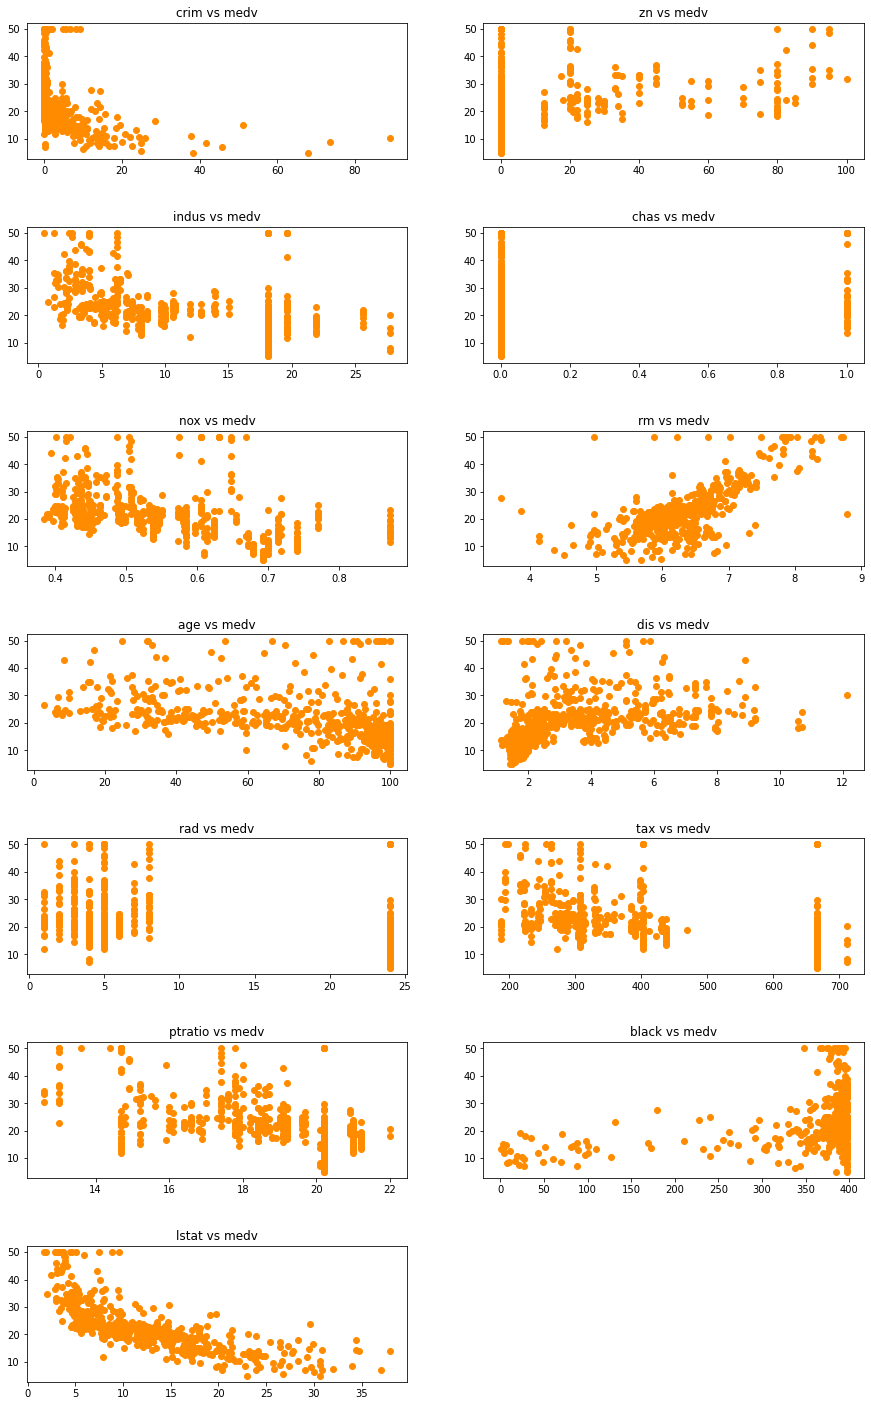

In [8]:
plt.figure(figsize=(15,25))
plt.subplots_adjust(hspace=0.5)
for i in range(13):
    plt.subplot(7,2,i+1)
    plt.title(header[i] + " vs " + header[13])
    plt.scatter(data[header[i]], data[header[13]], color='darkorange', vmin=0)
plt.show()

Las gráficas anteriores muestran esta correlación sobre los datos. Para ver en mayor profundidad la relación entre las variables, se va a calcular además su **coeficiente de correlación de Pearson**, donde los valores que más se acerquen al *1* o al *-1* serán los mejores. 

In [9]:
from scipy import stats
import numpy as np

In [10]:
print("Coeficiente de correlación de Pearson")

for name in header[:-1]:
    coef, _ = stats.pearsonr(data[name], data[header[13]])
    print("\t- " +name + ": " + str(coef)) 


Coeficiente de correlación de Pearson
	- crim: -0.38830460858681154
	- zn: 0.36044534245054316
	- indus: -0.483725160028373
	- chas: 0.1752601771902984
	- nox: -0.42732077237328253
	- rm: 0.6953599470715394
	- age: -0.3769545650045963
	- dis: 0.2499287340859039
	- rad: -0.3816262306397781
	- tax: -0.4685359335677672
	- ptratio: -0.5077866855375619
	- black: 0.3334608196570664
	- lstat: -0.737662726174015


Gracias a esta información se puede ver que las variables que tienen mayor relación con *medv* son, de mayor a menor correlación:

 - ***lstat***
 - *rm*
 - *ptratio*
 
El resto tienen un valor por debajo de **0.5**, por lo que se ha considerado que no están fuertemente relacionadas.

## Tarea 3: Construcción de un modelo de regresión lineal

Una vez se han analizado los datos, dado que la salida esperada es un número, es necesario construir un modelo de **regresión lineal**. Para ver su precisión, se evaluará con las siguientes técnicas:

 - **Coeficiente $R^2$** $\rightarrow$ $\displaystyle \mathrm {R^2} = \frac{\sigma^2_{XY}}{\sigma^2_X \sigma^2_Y}$
 
 
 - **RMSE** $\rightarrow$ $\displaystyle \operatorname {RMSE} ={\sqrt {\frac {\sum _{i=1}^{n}(y_{i}-x_{i})^{2}}{n}}}$
 
 
 - **MAE** $\rightarrow$ $\displaystyle \mathrm {MAE} ={\frac {\sum _{i=1}^{n}|y_{i}-x_{i}|}{n}}$

### Creación del modelo de regresión

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

### Entrenamiento del modelo de regresión

Primero es necesario dividir los datos para separar las etiquetas de los datos a usar.

In [13]:
X = np.array(data[header[:-1]])
y = np.array(data[header[-1]])
lr.fit(X, y)

LinearRegression()

La formula de **regresión lineal** de este problema tiene la siguiente forma:

$\displaystyle y=\beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2}+\cdots +\beta _{13}x_{13}+\varepsilon$

donde $\beta_i$ toma los valores que se muestran en la siguiente celda:

In [14]:
beta = np.array([lr.intercept_] + list(lr.coef_))
beta = pd.DataFrame(np.reshape(beta, (1, 14)))
beta.columns = ['b0'] + header[:-1]
display(beta)

,b0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,36.459488,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758


### Evaluación del modelo de regresión

In [15]:
y_pred = lr.predict(X)

In [16]:
r2 = lr.score(X, y)
rmse = np.sqrt(np.mean((y - y_pred)**2))
mae = np.mean(np.abs(y - y_pred))


print("Coeficiente R² =", r2)
print("RMSE =", rmse)
print("MAE =", mae)

Coeficiente R² = 0.7406426641094094
RMSE = 4.679191295697282
MAE = 3.2708628109003177


La evaluación generada por el *MAE*(*Mean Absolute Error*) sirve para determinar que, de media, se equivoca en 3.27 unidades, o lo que es lo mismo, se equivoca de media por **\$3270.86**, un error bastante grande para los valores que se están tratando.

Por otro lado, el coeficiente R² determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que se puede explicar por el modelo. Cuanto más se ajusta a '1', mayor será el ajuste del modelo a la variable que se intenta explicar. En este caso toma un valor de **0.7406**, lo cual es un valor relativamente aceptable.

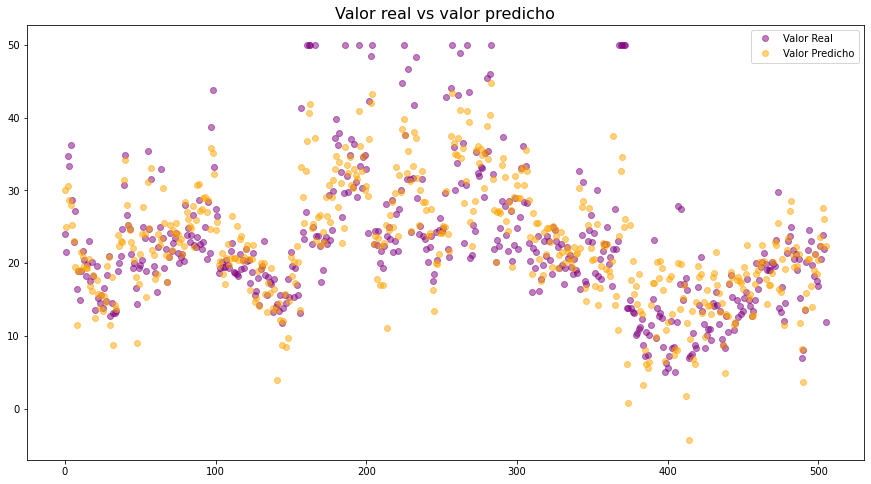

In [17]:
plt.figure(figsize=(15,8))

plt.plot(y, 'o', color='purple', alpha=0.5, label='Valor Real')
plt.plot(y_pred, 'o', color='orange', alpha=0.5, label='Valor Predicho')

plt.legend()
plt.title("Valor real vs valor predicho", fontsize=16)

plt.show()

## Tarea 4: Mejora del modelo de regresión lineal

A continuación se intenta mejorar los resultados obtenidos con el modelo anterior. Para ello se van a usar dos técnicas de *regularización*.

### Regularización

Las transformaciones de regularización tienen como finalidad reducir el nivel de complejidad de los modelos lineales. Para ello se modifican las funciones de coste del modelo básico. 


La función de coste del modelo lineal es *Residual Sum of Squares*: 

$\displaystyle RSS = \sum^{n}_{i=1}(y_i - \beta_0 - \sum^{p}_{j=1}\beta_j x{ij})^{2}$

Se llevan a cabo dos modificaciones distintas: **Ridge** y **Lasso**.

#### Ridge (L2)

Usa una regresión muy similar a *RSS*, con el añadido de un parámetro de contracción ($\alpha$) que minimiza el valor de los coeficientes reduciendo así su aportación al modelo en función de su importancia. Su función de coste es:

$\displaystyle Ridge = RSS + \alpha \sum^p_{j=1}\beta_j^2$

In [18]:
from sklearn.linear_model import Ridge

In [33]:
ridge_scores = []
ridge_coefs = []
alpha_values = []

for i in range(51):
    rr = Ridge(alpha=i*0.1)
    rr.fit(X, y)
    y_pred = rr.predict(X)
    mae = np.mean(np.abs(y - y_pred))
    ridge_scores.append(mae)
    ridge_coefs.append(rr.coef_)
    alpha_values.append(i*0.1)

In [34]:
ridge_coefs = np.array(ridge_coefs)

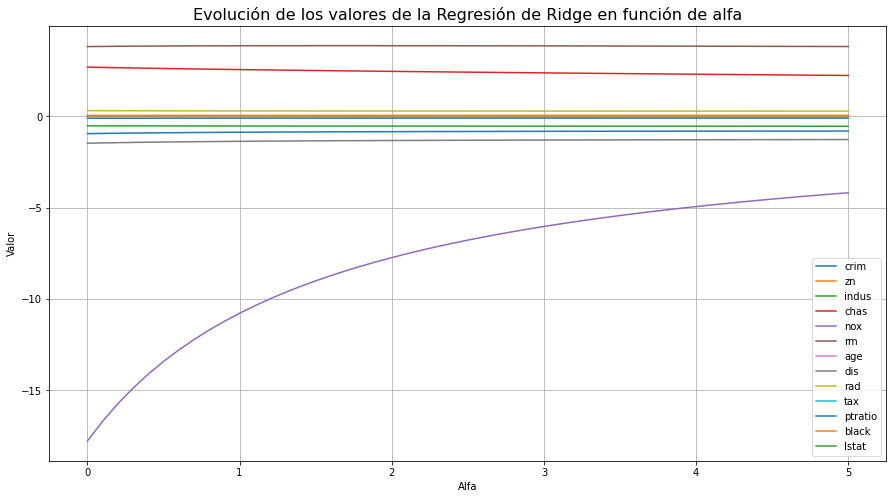

In [36]:
plt.figure(figsize=(15,8))

for i, name in enumerate(header[:-1]):
    plt.plot(alpha_values, ridge_coefs[:,i], label=name)

plt.legend()
plt.title("Evolución de los valores de la Regresión de Ridge en función de alfa", fontsize=16)
plt.xlabel("Alfa")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

La gráfica anterior muestra la importancia de cada uno de los atributos. Por ejemplo, se puede ver que el atributo *nox* tenía mucha importancia en el modelo original pero la ha ido perdiendo según aumentaba alfa, lo que indica que no es un atributo relevante. Por el contrario, el atributo *rm* se ha mantenido cercano a su valor original durante la evolución de alfa, demostrando su importancia en el modelo.

Una vez visto esto, es necesario determinar el valor óptimo de alfa para crear el modelo que genera mejores resultados.

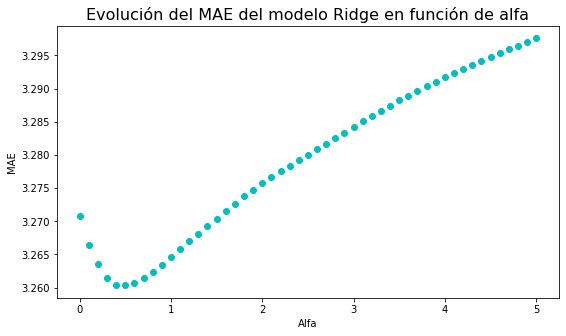

In [37]:
plt.figure(figsize=(9,5))

plt.plot(alpha_values, ridge_scores, 'co')

plt.title("Evolución del MAE del modelo Ridge en función de alfa", fontsize=16)
plt.xlabel("Alfa")
plt.ylabel("MAE")

plt.show()

In [30]:
best_alpha = ridge_scores.index(min(ridge_scores))*0.1

print("El mejor modelo usa un alfa de", best_alpha, "y tiene un MAE de", min(ridge_scores))

El mejor modelo usa un alfa de 0.4 y tiene un MAE de 3.2603288348954593


In [31]:
# Modelo con el mejor alfa
rr = Ridge(alpha=best_alpha)
rr.fit(X, y)
y_pred = rr.predict(X)

In [32]:
r2 = rr.score(X, y)
rmse = np.sqrt(np.mean((y - y_pred)**2))
mae = np.mean(np.abs(y - y_pred))


print("Coeficiente R² =", r2)
print("RMSE =", rmse)
print("MAE =", mae)

Coeficiente R² = 0.7401576284016107
RMSE = 4.6835646340049015
MAE = 3.2603288348954593


A pesar de que el *MAE* sea algo mejor que el del modelo original, el resto de medidas muestran que empeora. Por lo tanto se puede asumir que no se ha generado un mejor modelo.

Esto puede deberse a que la regularización *Ridge* es capaz de quitarle importancia a los atributos menos útiles pero no es capaz de eliminarlos (nunca llegan a valer 0). Otro posible motivo es que se está evaluando con los mismos datos con los que se está entrenando, por lo que no se puede ver si estos peores resultados se deben a un aumento de la capacidad de generalización del modelo.

#### Lasso (L1)

Es un tipo de regularización que intenta mejorar la capacidad de *Ridge*, gracias a que es capaz de eliminar por completo aquellos atributos que no son relevantes. Su función de coste es:

$\displaystyle Lasso = RSS + \alpha \sum^p_{j=1}|\beta_j|$

In [26]:
from sklearn.linear_model import Lasso

In [38]:
lasso_scores = []
lasso_coefs = []
alpha_values = []

# Lasso con el valor de alfa igual a 0 no converge bien y saca un warning
for i in range(1, 51):
    ls = Lasso(alpha=i*0.1)
    ls.fit(X, y)
    y_pred = ls.predict(X)
    mae = np.mean(np.abs(y - y_pred))
    lasso_scores.append(mae)
    lasso_coefs.append(ls.coef_)
    alpha_values.append(i*0.1)

In [39]:
lasso_coefs = np.array(lasso_coefs)

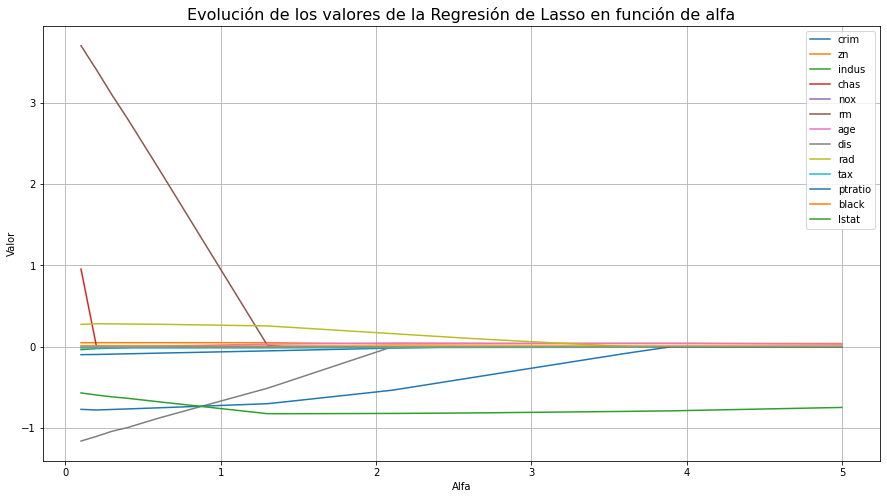

In [40]:
plt.figure(figsize=(15,8))

for i, name in enumerate(header[:-1]):
    plt.plot(alpha_values, lasso_coefs[:,i], label=name)

plt.legend()
plt.title("Evolución de los valores de la Regresión de Lasso en función de alfa", fontsize=16)
plt.xlabel("Alfa")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

En esta gráfica se observa que el atributo *lstat* es el más relevante para el modelo ya que no solo se mantiene su valor sino que aumenta ligeramente. Sin embargo, por ejemplo el atributo *chas* no parece tener mucha relevancia.

Una vez visto esto, es necesario determinar el valor óptimo de alfa para crear el modelo que genera mejores resultados.

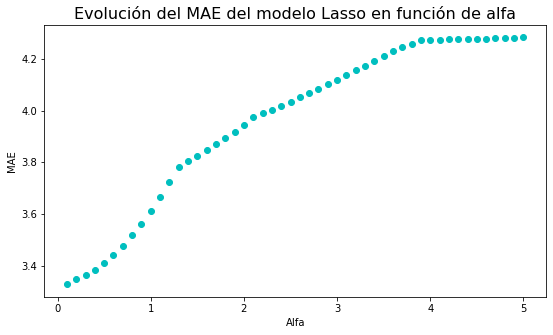

In [41]:
plt.figure(figsize=(9,5))

plt.plot(alpha_values, lasso_scores, 'co')

plt.title("Evolución del MAE del modelo Lasso en función de alfa", fontsize=16)
plt.xlabel("Alfa")
plt.ylabel("MAE")

plt.show()

In [42]:
best_alpha = (lasso_scores.index(min(lasso_scores))+1)*0.1

print("El mejor modelo usa un alfa de", best_alpha, "y tiene un MAE de", min(lasso_scores))

El mejor modelo usa un alfa de 0.1 y tiene un MAE de 3.3282231192242113


In [43]:
# Modelo con el mejor alfa
ls = Lasso(alpha=best_alpha)
ls.fit(X, y)
y_pred = ls.predict(X)

In [44]:
r2 = ls.score(X, y)
rmse = np.sqrt(np.mean((y - y_pred)**2))
mae = np.mean(np.abs(y - y_pred))


print("Coeficiente R² =", r2)
print("RMSE =", rmse)
print("MAE =", mae)

Coeficiente R² = 0.7269834862602695
RMSE = 4.800826274008644
MAE = 3.3282231192242113


A pesar de que este modelo funciona peor dados sus errores, puede deberse a que es capaz de generalizar a mayor nivel, pero todavía no puede verse hasta que no se realice la división de los datos en entrenamiento y test. 